In [44]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [45]:
titanic = pd.read_csv('https://query.data.world/s/i3kphasugbts4cqem257cou374ijdh')  # Reading the dataframe

In [46]:
titanic.head() # Taking glimpse of dataframe

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
titanic.describe()   # Viewing the statistics of the daframe

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [48]:
titanic.dtypes        # Checking the datatypes of columns

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [49]:
titanic.shape

(1310, 14)

In [50]:
null_percentage = round(titanic.isnull().sum() / len(titanic) * 100, 2)      # Counting the percentage of null value in each variable
null_percentage

pclass        0.08
survived      0.08
name          0.08
sex           0.08
age          20.15
sibsp         0.08
parch         0.08
ticket        0.08
fare          0.15
cabin        77.48
embarked      0.23
boat         62.90
body         90.76
home.dest    43.13
dtype: float64

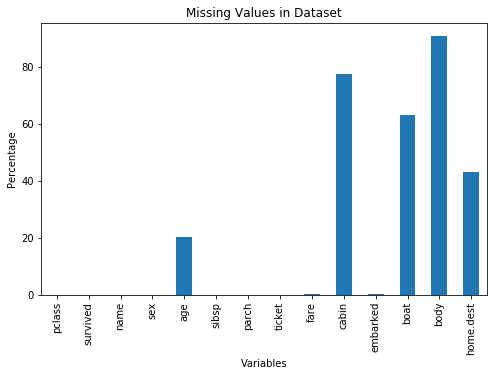

In [51]:
null_percentage.plot.bar( title = "Missing Values in Dataset", figsize=(8,5)) # plotting percentage of missing values
plt.xlabel('Variables')
plt.ylabel('Percentage')
#plt.savefig('1.png')
plt.show()

In [52]:
titanic = titanic.drop(['boat', 'body', 'home.dest', 'cabin'], axis=1)  # Removing the columns with too many missing values

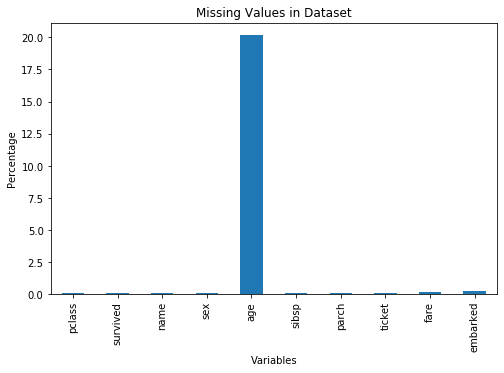

In [53]:
null_percentage = round(titanic.isnull().sum() / len(titanic) * 100, 2)      # Counting the percentage of null value in each variable
null_percentage.plot.bar( title = "Missing Values in Dataset", figsize=(8,5))
plt.xlabel('Variables')
plt.ylabel('Percentage')
#plt.savefig('2.png')
plt.show()

In [54]:
titanic.isnull().sum()          # Counting the number of null value in each variable again

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [55]:
titanic.drop(index = 1309, inplace = True)   # Removing the row which resulted in null value of pclass, survived, name, sex, sibsp, parch, and ticket

In [56]:
titanic.isnull().sum()          # Counting the number of null value in each variable one more time 

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [57]:
titanic['fare'].fillna(titanic['fare'].dropna().median(), inplace=True) # Replacing missing fare with median value
titanic['age'].fillna(titanic['age'].dropna().mean(), inplace = True) # Replacing missing age with median age
titanic['embarked'].fillna(titanic['embarked'].dropna().mode()[0], inplace = True)  # Replacing missing port with mode port

In [58]:
titanic.isnull().sum()          # Counting the number of null value in each variable one last time 

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [59]:
sex = titanic.groupby('sex')['sex'].count().reset_index(name='counts') # Finding the population of each gender
sex  

,sex,counts
0,female,466
1,male,843


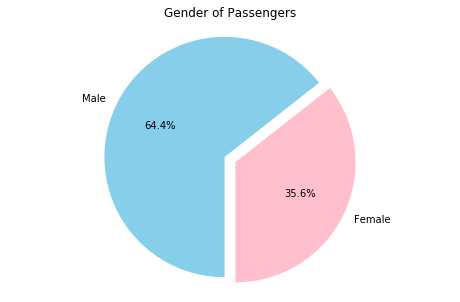

In [60]:
labels = ['Female', 'Male']
values = sex['counts']
colors = ['pink', 'skyblue']
explode = [0.1,0]
plt.figure(figsize=(8,5))
plt.title('Gender of Passengers')
plt.pie(values,labels=labels,colors=colors,explode=explode, autopct='%1.1f%%', startangle=-90)
plt.axis('equal')
#plt.savefig('3.png')
plt.show()

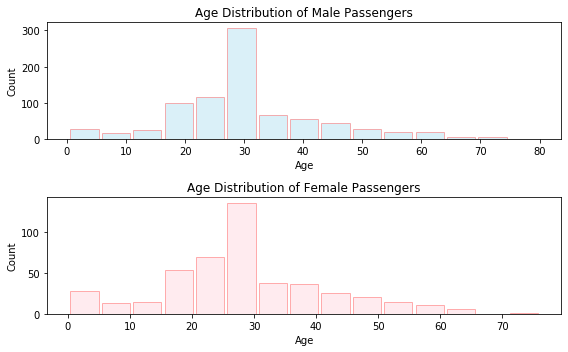

In [61]:
# Visualizing age distribution in both the genders
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.hist(titanic[titanic['sex'] == 'male']['age'],rwidth=0.9,alpha=0.3,color='skyblue',bins=15, edgecolor='red') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Age Distribution of Male Passengers') 
plt.subplot(212)
plt.hist(titanic[titanic['sex'] == 'female']['age'],rwidth=0.9,alpha=0.3,color='pink',bins=15, edgecolor='red') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Age Distribution of Female Passengers') 
plt.tight_layout()  # This prevents overlapping of the labels of two figures
#plt.savefig('4.png')

In [62]:
titanic.groupby(['sex', 'survived'])['survived'].count().unstack()  # Viewing surived and dead population in each gender

survived,0.0,1.0
sex,,
female,127,339
male,682,161


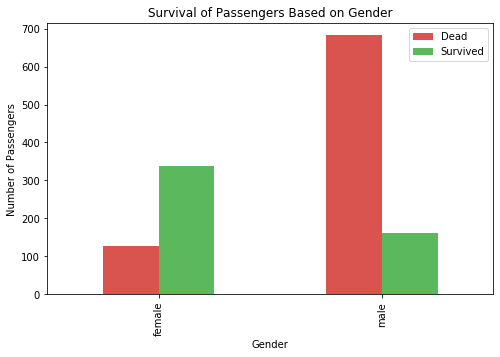

In [63]:
# Visualizing surival in each gender
sex_survived = titanic.groupby(['sex', 'survived'])['survived'].count().unstack()
sex_survived.plot.bar(color=['#d9534f', '#5cb85c'], title = "Survival of Passengers Based on Gender", figsize=(8,5))
plt.legend(['Dead', 'Survived'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
#plt.savefig('5.png')
plt.show()

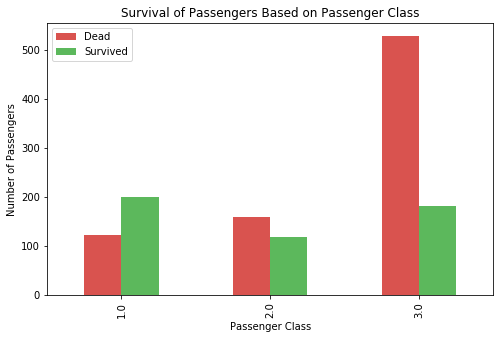

In [64]:
# Visualizing survival in each passenger class
class_survived = titanic.groupby(['pclass', 'survived'])['survived'].count().unstack()
class_survived.plot.bar(color=['#d9534f', '#5cb85c'], title = "Survival of Passengers Based on Passenger Class", figsize=(8,5))
plt.legend(['Dead', 'Survived'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
#plt.savefig('6.png')
plt.show()

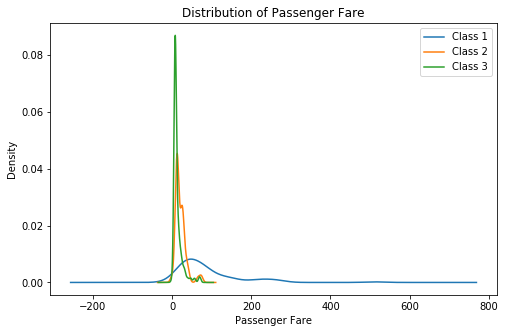

In [65]:
# Visualizing distribution of fare in each passenger class
titanic[titanic['pclass'] == 1]['fare'] .plot.kde(figsize=(8,5))
titanic[titanic['pclass'] == 2]['fare'] .plot.kde()
titanic[titanic['pclass'] == 3]['fare'] .plot.kde()
plt.legend(['Class 1', 'Class 2', 'Class 3'])
plt.title('Distribution of Passenger Fare')
plt.xlabel('Passenger Fare')
#plt.savefig('7.png')
plt.show()

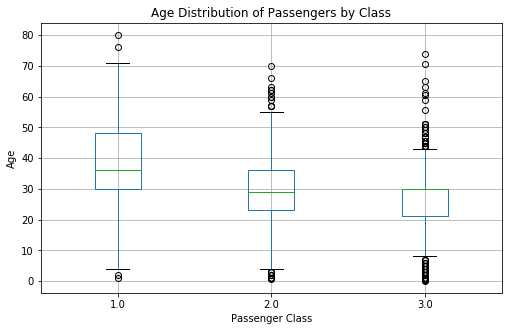

In [76]:
# Visualizing distribution of age in each passenger class
titanic.boxplot(column = 'age', by='pclass', figsize=(8,5))
plt.xlabel('Passenger Class') 
plt.ylabel('Age') 
plt.title('Age Distribution of Passengers by Class')
plt.suptitle('')   # This removes the non essential automatically generated title in the figure
#plt.savefig('8.png')
plt.show()

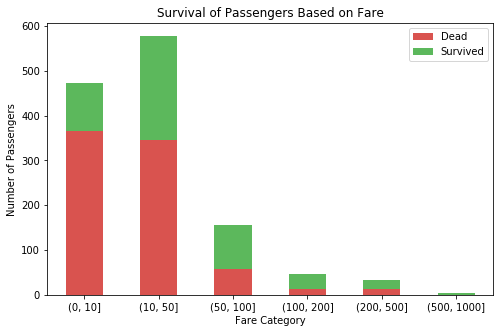

In [67]:
# Dividing our fare into categories
bins = [0,10,50,100,200,500,1000]
titanic['fare_cat'] = pd.cut(titanic['fare'], bins)


# Visualizing survival based on fare class
fare_survived = titanic.groupby(['fare_cat', 'survived'])['survived'].count().unstack()
fare_survived.plot.bar(color=['#d9534f', '#5cb85c'], title = "Survival of Passengers Based on Fare", figsize=(8,5), stacked = True)
plt.legend(['Dead', 'Survived'])
plt.xlabel('Fare Category')
plt.ylabel('Number of Passengers')
plt.xticks(rotation='horizontal') # For rotating x axis labels
#plt.savefig('9.png')
plt.show()

In [68]:
# Survival based on passenger class and port
embarked = titanic.groupby(['embarked', 'survived'])['survived'].count().unstack()
embarked

survived,0.0,1.0
embarked,,
C,120,150
Q,79,44
S,610,306


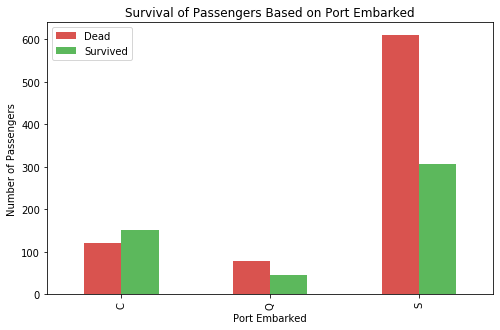

In [69]:
embarked.plot.bar(title = "Survival of Passengers Based on Port Embarked", figsize=(8,5), color=['#d9534f', '#5cb85c'])
plt.legend(['Dead', 'Survived'])
plt.xlabel('Port Embarked')
plt.ylabel('Number of Passengers')
#plt.savefig('10.png')
plt.show()

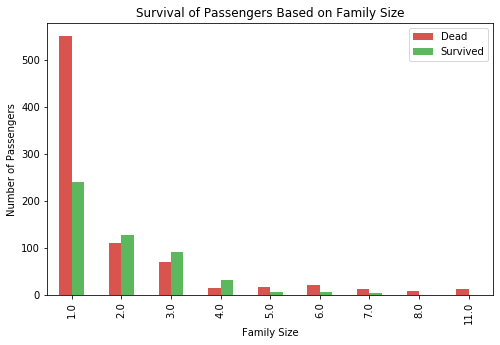

In [70]:
# Visualizing the effects of family size on survival
titanic['familysize'] = titanic['sibsp'] + titanic['parch'] + 1    # creating a new variable called family size
family_survived = titanic.groupby(['familysize', 'survived'])['survived'].count().unstack()
family_survived.plot.bar(color=['#d9534f', '#5cb85c'], title = "Survival of Passengers Based on Family Size", figsize=(8,5))
plt.legend(['Dead', 'Survived'])
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
#plt.savefig('11.png')
plt.show()

In [71]:
# Creating a new variable called title by splitting the name variable
titanic['title'] = titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False)
title = titanic.groupby(['title', 'sex'])['survived'].count().unstack()
title

sex,female,male
title,,
Capt,NaN,1.0
Col,NaN,4.0
Countess,1.0,NaN
Don,NaN,1.0
Dona,1.0,NaN
Dr,1.0,7.0
Jonkheer,NaN,1.0
Lady,1.0,NaN
Major,NaN,2.0


In [72]:
# Converting the uncommon titles into common ones
titanic['title'] = titanic['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs') 
title = titanic.groupby(['title', 'sex'])['survived'].count().unstack()
title

sex,female,male
title,,
Master,NaN,61.0
Miss,264.0,NaN
Mr,NaN,757.0
Mrs,198.0,NaN
Rare,4.0,25.0


In [73]:
# Viewing the survival of each title
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Master,0.508197
1,Miss,0.678030
2,Mr,0.162483
3,Mrs,0.787879
4,Rare,0.379310


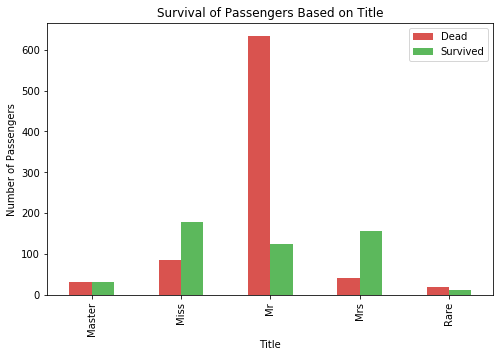

In [74]:
# Visualizing survival based on title
titanic_title = titanic.groupby(['title', 'survived'])['survived'].count().unstack()
titanic_title.plot.bar(color=['#d9534f', '#5cb85c'], title = "Survival of Passengers Based on Title", figsize=(8,5))
plt.legend(['Dead', 'Survived'])
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
#plt.savefig('12.png')
plt.show()